# Kaggle - Titanic Survival Passengers Prediction 

This is my first Kaggle competition - predict the survival passengers from the Titanic. In this project, I have learned 
    - Data processing with **numpy and pandas** 
        - understand different types of data 
        - work with missing values 
        - feature engineering 
    - data visiualization with **seaborn**
    - Data prediction with sklearn 
        - decision tree 
        - kNN 
        - random forest
        - logistic regression 

The accuracy of my model is 78%. Though I do find that simpler and easier feature engineering process gives a model with a higher accuracy. But the main goal of this project is to learn different techniques of data analysis. I will learn about the efficiency of different feature engineering methods in the next kaggle project. 

- 2020.05.31

        

# Load data 

In [1]:
## imports
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
## load data 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Understand the data 

In [4]:
print(train_df.info())
print('*'*50)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  

## Remove unrelated columns 

In [5]:
PassengerId = test_df['PassengerId']
y = train_df['Survived']

In [6]:
train_df = train_df.drop(['PassengerId'], axis=1);

In [7]:
train_df['Survived'] = y

In [8]:
test_df = test_df.drop(['PassengerId'], axis = 1)

## Group features 

**bold** : missing values 

*italic* : unique values

- numertical features 
    1. Pclass
    2. **Age**
    3. SibSp
    4. Parch
    5. **Fare** 
    

- categorical features => convert to numbers 
    1. Sex
    2. **Embarked**
    

- alphanumerical/text features => engineering features 
    1. **Cabin**
    2. *Ticket*
    3. *Name*

    


# process the data 

## Convert categorical features to numbers 

In [9]:
print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


because Embarked had nan's, we need to work with the nan first and factorize it 

In [10]:
train_df['Sex'] = pd.factorize(train_df['Sex'])[0]
# 1- female 0-male 
test_df['Sex'] = pd.factorize(test_df['Sex'])[0]
# 1- female 0-male 

## Work with missing values 

In [11]:
# Let's write a functin to print the total percentage of the missing values.(this can be a good exercise for beginners to try to write simple functions like this.)
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [12]:
missing_percentage(train_df)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [13]:
missing_percentage(test_df)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


we can work with Embarked first because it has the least percentage of missing values


### Embarked 

In [14]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)
    

In [15]:
percent_value_counts(train_df, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


plot the figure to see if the mode 'S' is appropriate to fill in the nan's

In [16]:
train_df[train_df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


they are both female, in Pclass 1 and Fare of 80 ; see if Pclass and fare are related to Embarked 

Text(0.5, 1.0, 'Test Set')

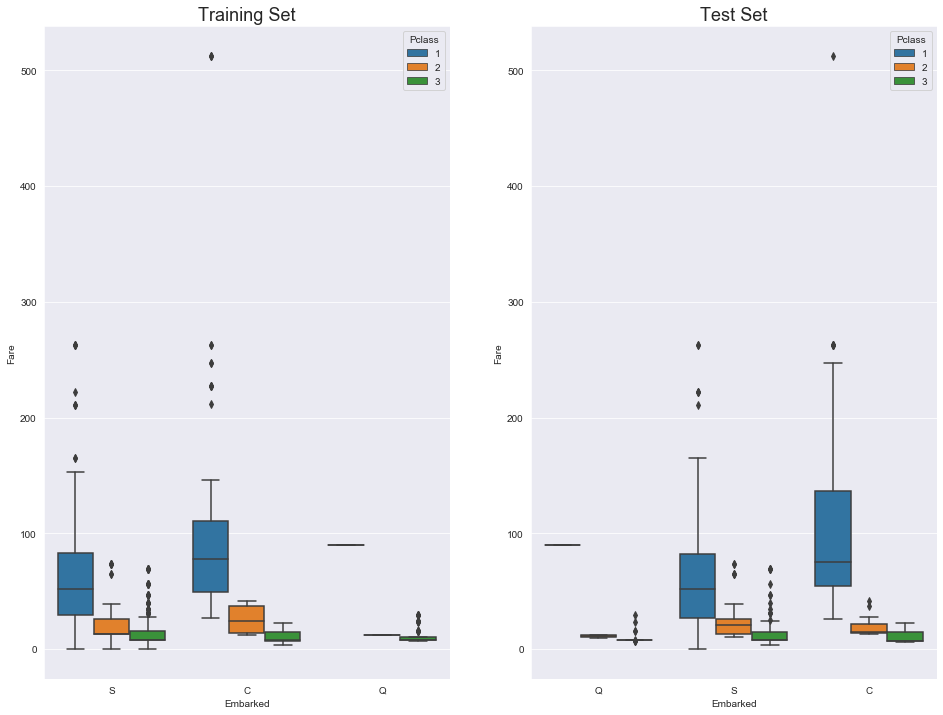

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_df, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test_df, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)


with Pclass = 1 and fare = 80, it is more likely to embark at C. Therefore, we can fill nan with C 

In [18]:
train_df['Embarked'].fillna("C", inplace=True)

In [19]:
train_df['Embarked'] = pd.factorize(train_df['Embarked'])[0]
# 1- female 0-male 
test_df['Embarked'] = pd.factorize(test_df['Embarked'])[0]
# 1- female 0-male 

### Fare

there is only one missing value of fare in test_df
see how it is like

In [20]:
test_df[test_df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,1


Pclass = 3 and embarked at S, from the above figure we can roughly estimate the fare as the mean

In [21]:
test_df[['Fare','Embarked','Pclass']].groupby(['Pclass','Embarked'], as_index=False).mean()

,Pclass,Embarked,Fare
0,1,0,90.000000
1,1,1,76.677504
2,1,2,110.073511
3,2,0,11.273950
4,2,1,23.056090
5,2,2,20.120445
6,3,0,8.998985
7,3,1,13.913030
8,3,2,10.658700


In [22]:
test_df['Fare'].fillna(13.91, inplace=True)

In [23]:
## a simpler version 

# missing_value = test[(test_df.Pclass == 3) & 
#                      (test_df.Embarked == "S") & 
#                      (test_df.Sex == "male")].Fare.mean()
# ## replace the test.fare null values with test.fare mean
# test.Fare.fillna(missing_value, inplace=True)

### Age

about 20% in both the test and train datasets the age is missing. we could use the known distribution of age to assign values to the nan or we can use ML to estimate the age based on other parameters such as SibSp, parch etc. so we will deal with it in the feature engineering part  

## Engineering feature 

features need to be engineered

1. Name: mainly use the titles of the names 
2. Ticket: see if there is anything we can use 
3. Cabin: a letter + some number; the letter could be used 
4. Age: missing value with ML; see if needed to group them 


features could be engineered (convert as groups rather than continuous values) 
1. SibSp
2. parch 

### Cabin 

The naming convention of the Cabin is a letter followed by some numbers. People with multiple cabins still have the same letter. So we can just use the first letter as the feature

we need to first combine the test and training sets 

The cabin is directly associated with class, according to an answer from Quora. https://www.quora.com/What-were-the-ticket-prices-to-board-the-Titanic. Therefore, the NAN values in cabin can be determined by its fare and class. 

In [24]:
all_data = pd.concat([train_df,test_df], ignore_index=False)

In [25]:
all_data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,2
415,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,1
417,NaN,3,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,NaN,2


In [26]:
all_cabin_nonan = all_data[all_data['Cabin'].notnull()]

In [27]:
all_cabin_nonan['Cabin'] = [i[0] for i in all_cabin_nonan['Cabin']]

In [28]:
all_cabin_nonan = all_cabin_nonan.sort_values(by='Cabin')

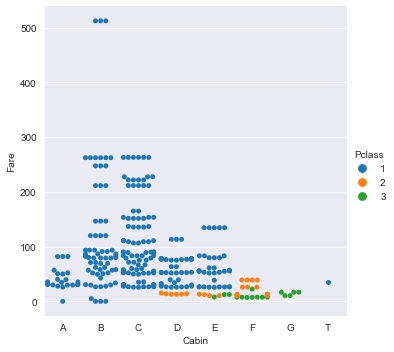

In [29]:
sns.catplot(x="Cabin", y="Fare", hue='Pclass', kind="swarm", data=all_cabin_nonan);

from the plot, I decide to use bootstrap to generate values 

In [30]:
## find the threshold from F column
all_cabin_nonan[["Fare","Pclass"]][(all_cabin_nonan["Cabin"]=='F') & (all_cabin_nonan["Pclass"]==3)].max()

Fare      22.3583
Pclass     3.0000
dtype: float64

In [31]:
all_cabin_nonan["Cabin"] = pd.factorize(all_cabin_nonan["Cabin"])[0]

In [32]:
all_cabin_nonan["Cabin"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [33]:
all_cabin_nan = all_data[all_data['Cabin'].isnull()]

In [34]:
cabin=np.zeros((all_data['Cabin'].isnull().sum(),1))


for i in range(len(cabin)):
    data = all_cabin_nan.iloc[i]
    if data['Pclass'] == 3:
        if data['Fare'] > 20:
            cabin[i] = 5
        else:
            dist = all_cabin_nonan["Cabin"][(all_cabin_nonan["Cabin"] >=3) & (all_cabin_nonan["Cabin"] <= 5)]
            cabin[i] = np.random.choice(dist)
    elif data['Pclass'] == 2:
        if data['Fare'] > 20:
            cabin[i] = 5
        else:
            dist = all_cabin_nonan["Cabin"][(all_cabin_nonan["Cabin"] >= 2) & (all_cabin_nonan["Cabin"] <= 5)]
            cabin[i] = np.random.choice(dist)
    else:
        if data['Fare'] > 500:
            cabin[i] = 1
        elif data['Fare'] > 200:
            dist = all_cabin_nonan["Cabin"][(all_cabin_nonan["Cabin"] >= 1) & (all_cabin_nonan["Cabin"] <= 2)]
            cabin[i] = np.random.choice(dist)
        elif data['Fare'] < 100:
            dist = all_cabin_nonan["Cabin"][(all_cabin_nonan["Cabin"] >= 0) & (all_cabin_nonan["Cabin"] <= 4)]
            # cabin T is ignored because there is only one of it -> statistically very small
            cabin[i] = np.random.choice(dist)
        else:
            dist = all_cabin_nonan["Cabin"][(all_cabin_nonan["Cabin"] >= 1) & (all_cabin_nonan["Cabin"] <= 4)]
            cabin[i] = np.random.choice(dist)

In [35]:
all_cabin_nan['Cabin'] = cabin

In [36]:
all_data_new = pd.concat([all_cabin_nonan,all_cabin_nan], ignore_index=False) 

In [37]:
all_data_new['Cabin'] = all_data_new['Cabin'].astype(int)
# train_df_new = all_data_new[all_data_new['Survived'].notnull()]
# test_df_new = all_data_new[all_data_new['Survived'].isnull()]

In [38]:
# train_df_new.head()

### Name 

get the title of all the names 

In [39]:
all_data_new.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,0.0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,0,1
174,0.0,1,"Smith, Mr. James Clinch",0,56.0,0,0,17764,30.6958,0,1
806,0.0,1,"Andrews, Mr. Thomas Jr",0,39.0,0,0,112050,0.0000,0,0
445,1.0,1,"Dodge, Master. Washington",0,4.0,0,2,33638,81.8583,0,0
599,1.0,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,1,0,PC 17485,56.9292,0,1


In [40]:
# all_data_new['Title'] = all_data_new.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [41]:

all_data_new['Title']=all_data_new.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())


In [42]:
all_data_new['Title'].unique()


array(['Mr', 'Master', 'Sir', 'Dr', 'Miss', 'Mrs', 'Lady', 'Col', 'Mme',
       'Mlle', 'Major', 'Capt', 'the Countess', 'Dona', 'Don', 'Rev',
       'Ms', 'Jonkheer'], dtype=object)

In [43]:
# pd.crosstab(all_data_new['Title'], train_df['Sex'])

In [44]:
# all_data_new['Title'] = all_data_new['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
#  	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare') ## simply put all the rare titles in one group is not wise. because the title is important in the Age prediction later! 

# all_data_new['Title'] = all_data_new['Title'].replace('Mlle', 'Miss') # Mlle to Miss
# all_data_new['Title'] = all_data_new['Title'].replace('Ms', 'Miss') # Ms to Miss
# all_data_new['Title'] = all_data_new['Title'].replace('Mme', 'Mrs') # Mme to Mrs
    

In [45]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

In [46]:
all_data_new['Title']=all_data_new.Title.map(newtitles)

In [47]:
all_data_new['Title'].isnull().sum()

0

In [48]:
all_data_new.drop(['Name'], axis=1, inplace=True)

In [49]:
all_data_new['Title'].unique()

array(['Mr', 'Master', 'Royalty', 'Officer', 'Miss', 'Mrs'], dtype=object)

In [50]:
all_data_new["Title"] = pd.factorize(all_data_new["Title"])[0]

### Ticket

to be decided; drop it first 

In [51]:
all_data_new['Ticket'].describe()

count         1309
unique         929
top       CA. 2343
freq            11
Name: Ticket, dtype: object

In [52]:
ticket = all_data_new['Ticket']

In [53]:
all_data_new.drop(['Ticket'], axis=1, inplace=True)

In [54]:
all_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
96,0.0,1,0,71.0,0,0,34.6542,0,1,0
174,0.0,1,0,56.0,0,0,30.6958,0,1,0
806,0.0,1,0,39.0,0,0,0.0000,0,0,0
445,1.0,1,0,4.0,0,2,81.8583,0,0,1
599,1.0,1,0,49.0,1,0,56.9292,0,1,2


### SibSp & parch

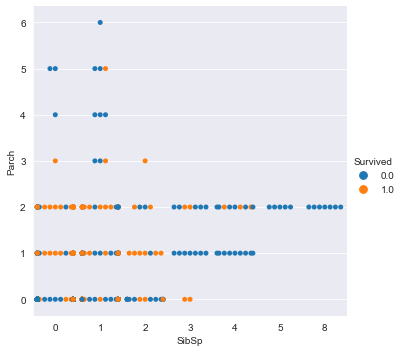

In [55]:
sns.catplot(x="SibSp", y="Parch", hue='Survived', kind="swarm", data=all_data_new);

the plot does not show obvious groups of Parch or SibSp with survival. Hence I am keeping them as they are.

Create a feature called the family size to see if this is relavant 

In [56]:

all_data_new['FamSiz'] = all_data_new['Parch'] + all_data_new['SibSp'] + 1

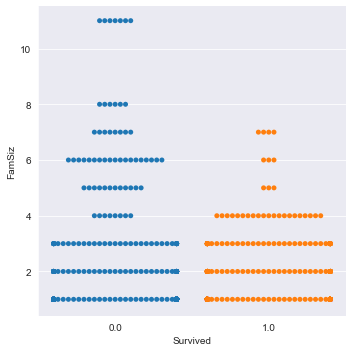

In [57]:
sns.catplot(x="Survived", y="FamSiz", kind="swarm", data=all_data_new);

if you are a family with more than 7 people, judging from the plot, the chance of living is zero. Hence I can create a feature called FamSiz_7
familysize=7 

In [58]:
all_data_new['FamSiz_7'] = all_data_new['FamSiz'] > 6

In [59]:
all_data_new.drop(['FamSiz'], axis=1, inplace=True)

In [60]:
all_data_new.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamSiz_7
412,NaN,3,1,28.0,0,0,7.7750,3,1,4,False
413,NaN,3,0,NaN,0,0,8.0500,3,1,0,False
415,NaN,3,0,38.5,0,0,7.2500,3,1,0,False
416,NaN,3,0,NaN,0,0,8.0500,5,1,0,False
417,NaN,3,0,NaN,1,1,22.3583,5,2,1,False


In [61]:
# all_data_new.drop(['SibSp','Parch'],axis=1,inplace=True)

the only column with missing values is the Age.

### Age 

first, let's find out how many ages are missing in the training and test sets separately.  

In [62]:
print(train_df['Age'].isnull().sum()/len(train_df['Age']))
print(test_df['Age'].isnull().sum()/len(test_df['Age']))

0.19865319865319866
0.20574162679425836


because we need to use age as a feature to predict survival rate, the survival is not used here to predict age. (not sure if this is correct. But if survival rate is used to predict age and then age is again used to predict survival, wouldn't it be a circulation?)

I choose not to use the survival to predict age. We can plot the relations between age and other features. If the distribution of age significantly differs from the feature, this feature is included in the prediction of age. 

In [63]:
features = ['Sex','Pclass','Cabin','Embarked','Title','Fare','SibSp','Parch']

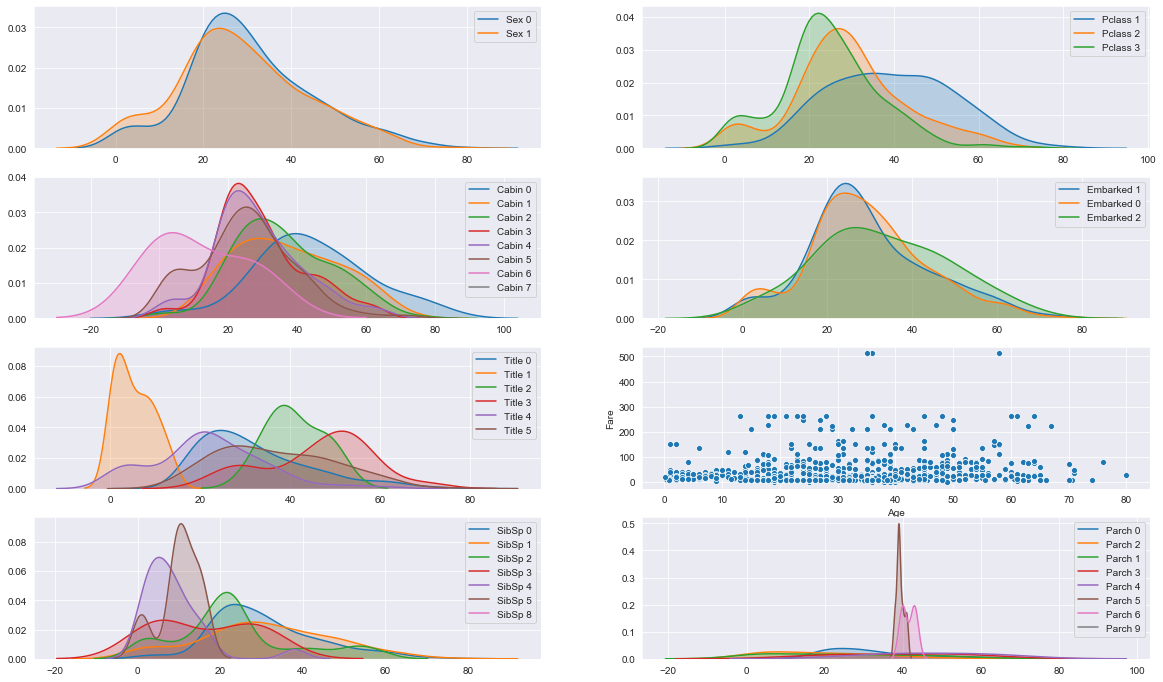

In [64]:
i=0
fig, axes = plt.subplots(ncols=2,nrows=4, figsize=(20,12))
axes = axes.flatten()
for feature in features:
    if feature == 'Fare':
        sns.scatterplot(x='Age', y=feature, data=all_data_new,legend=False, ax = axes[i])
    else:
        y_axis = all_data_new[feature].unique()
        for y in y_axis:
            sns.kdeplot(all_data_new.loc[(all_data_new[feature] == y),'Age'] , shade=True,label= feature +" "+ str(y), ax = axes[i]);
    #     axes[i].title('Age Distribution '+ feature, fontsize = 25, pad = 40)
    #     axes[i].xlabel("Age", fontsize = 15, labelpad = 20)
    #     axes[i].ylabel('Frequency', fontsize = 15, labelpad= 20);
    i=i+1

from the plot we can see that features including Pclass, Cabin, Title, SibSp and Parch. But Parch should not be directly related to age (if one is 34 and have parent or children, and if his/her parents or children age is missing). I will include the other five features to predict a passenger's age.

after some tests, the random forest method is not working that well in the prediction. So I use another method found in the Discussion of this competition. 
https://www.kaggle.com/goldens/titanic-on-the-top-with-a-simple-model

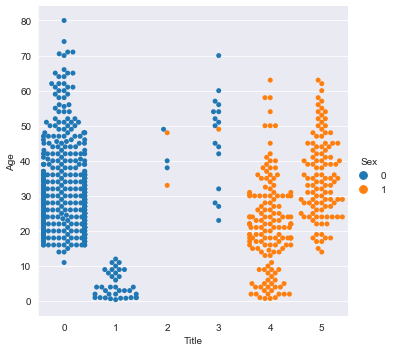

In [65]:
sns.catplot(x="Title", y="Age", hue='Sex', kind="swarm", data=all_data_new[all_data_new['Survived'].notnull()]);

here we can see that there are obvious differences between the age and the title. Hence we can use the mean/mode of each title to predict age of the person

In [66]:
age_predict_mean = all_data_new.groupby(['Title','Sex']).Age.mean()

In [67]:
age_predicts = all_data_new[all_data_new.Age.isnull()]

In [68]:
for ind in age_predict_mean.index:
    age_predicts['Age'][(age_predicts['Title'] == ind[0])&(age_predicts['Sex'] == ind[1])] = age_predict_mean.iloc[0]

In [69]:
age_known = all_data_new[all_data_new.Age.notnull()]

all_data_new = pd.concat([age_known,age_predicts], ignore_index=False) 

all_data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamSiz_7
96,0.0,1,0,71.0,0,0,34.6542,0,1,0,False
174,0.0,1,0,56.0,0,0,30.6958,0,1,0,False
806,0.0,1,0,39.0,0,0,0.0000,0,0,0,False
445,1.0,1,0,4.0,0,2,81.8583,0,0,1,False
599,1.0,1,0,49.0,1,0,56.9292,0,1,2,False


In [70]:
all_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 96 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Cabin     1309 non-null   int32  
 8   Embarked  1309 non-null   int64  
 9   Title     1309 non-null   int64  
 10  FamSiz_7  1309 non-null   bool   
dtypes: bool(1), float64(3), int32(1), int64(6)
memory usage: 108.7 KB


## Clean up the data (get dummies)

In [71]:
# # create dummy variables for categorical features
# pclass_dummies = pd.get_dummies(all_data_new.Pclass, prefix="Pclass")
# title_dummies = pd.get_dummies(all_data_new.Title, prefix="Title")
# cabin_dummies = pd.get_dummies(all_data_new.Cabin, prefix="Cabin")
# embarked_dummies = pd.get_dummies(all_data_new.Embarked, prefix="Embarked")

In [72]:
# concatenate dummy columns with main dataset
# all_data_dummies = pd.concat([all_data_new, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

In [73]:
# drop categorical fields
# all_data_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [74]:
# all_data_dummies.columns

# Model training

In [77]:
all_data_new.drop(['FamSiz_7'],axis=1,inplace=True)

In [78]:
train_data = all_data_new[all_data_new.Survived.notnull()]
test_data = all_data_new[all_data_new.Survived.isnull()]
y = train_data['Survived']
train_data.drop(['Survived'],axis=1,inplace=True)
test_data.drop(['Survived'],axis=1,inplace=True)

In [79]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
293,1,0,53.0,1,1,81.8583,0,1,3
331,1,0,39.0,0,0,29.7000,0,2,0
28,1,0,41.0,0,0,30.5000,0,1,0
208,1,1,33.0,0,0,27.7208,0,2,4
46,1,0,45.0,0,0,29.7000,0,2,0


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
scaler = StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
## create train data and dev data 
X_train, X_holdout, y_train, y_holdout = train_test_split(train_data.values, y, test_size=0.3,
random_state=17)

## Decision tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)


tree_params = {'max_depth': range(2,7),
               'max_features': range(2,15)}

tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1, verbose=True) 

tree_grid.fit(X_train, y_train)

## kNN

In [2]:
# for kNN, we need to scale features
knn = KNeighborsClassifier(n_neighbors=7)
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined

## Random forest

In [83]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
forest_params = {'max_depth': range(2,12),
                 'max_features': range(2,12)}

forest_grid = GridSearchCV(forest, forest_params,
                           cv=5, n_jobs=-1, verbose=True)

forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=17,
                                    

## Logistic regression 

In [84]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,grid,cv=10)
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Determine the best choice 

In [ ]:
dev_score = [accuracy_score(y_holdout, tree_grid.predict(X_holdout)),
             accuracy_score(y_holdout, knn_grid.predict(X_holdout)),
             accuracy_score(y_holdout, forest_grid.predict(X_holdout)),
             accuracy_score(y_holdout, logreg_grid.predict(X_holdout)),]

In [85]:
# print('Decision Tree:')
# # print('best parameters: ',tree_grid.best_params_) #{'max_depth': 6, 'max_features': 17}
# print('best score: ',tree_grid.best_score_ )
# print('Dev score: ',accuracy_score(y_holdout, tree_grid.predict(X_holdout)))
# print('kNN:')
# # print('best parameters: ',knn_grid.best_params_) #{'max_depth': 6, 'max_features': 17}
# print('best score: ',knn_grid.best_score_ )
# print('Dev score: ',accuracy_score(y_holdout, knn_grid.predict(X_holdout)))
print('Random Forest:')
# print('best parameters: ',forest_grid.best_params_) #{'max_depth': 6, 'max_features': 17}
print('best score: ',forest_grid.best_score_ )
print('Dev score: ',accuracy_score(y_holdout, forest_grid.predict(X_holdout)))
print('Logistic Regression:')
# print('best parameters: ',forest_grid.best_params_) #{'max_depth': 6, 'max_features': 17}
print('best score: ',logreg_grid.best_score_ )
print('Dev score: ',accuracy_score(y_holdout, logreg_grid.predict(X_holdout)))

Random Forest:
best score:  0.8137806451612903
Dev score:  0.835820895522388
Logistic Regression:
best score:  0.7849206349206349
Dev score:  0.8246268656716418


## Prediction

In [86]:
test_survive = forest_grid.predict(test_data)
test_data['Survive'] = test_survive

In [87]:
test_data = test_data.sort_index()

In [88]:
test_data[test_data['FamSiz_7']==1]

KeyError: 'FamSiz_7'

In [89]:
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': test_data['Survive'].astype(int)})
output.to_csv('my_submission_v8.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
